In [5]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

pathData = os.getcwd() + '/ratings.csv'
data = pd.read_csv(pathData)
data = data.drop(["timestamp"], axis=1)

#pathData = os.getcwd() + '/ratings0.csv'
#data = pd.read_csv(pathData, header=None)
#data.columns = ["userId", "movieId", "rating"]

In [6]:
data.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [9]:
X=data.to_numpy()
sort_objects = np.unique(X[:, 1])
sort_users = np.unique(X[:, 0])

# user and object max ids
user_max = int(np.amax(X[:, 0]))  # user max index
object_max = int(np.amax(X[:, 1]))  # object max index
print('Max user id: ', user_max)
print('Max movie id: ', object_max)

for i in range(X.shape[0]):
    X[i, 0] = np.where(sort_users == int(X[i, 0]))[0][0]
    X[i, 1] = np.where(sort_objects == int(X[i, 1]))[0][0]

print(X.shape)
print(X)
# user and object max ids
user_max = int(np.amax(X[:, 0]))  # user max index
object_max = int(np.amax(X[:, 1]))  # object max index
print('Max user id: ', user_max)
print('Max movie id: ', object_max)

Max user id:  671
Max movie id:  163949
(100004, 3)
[[0.000e+00 3.000e+01 2.500e+00]
 [0.000e+00 8.330e+02 3.000e+00]
 [0.000e+00 8.590e+02 3.000e+00]
 ...
 [6.700e+02 4.597e+03 4.000e+00]
 [6.700e+02 4.610e+03 2.500e+00]
 [6.700e+02 4.696e+03 3.500e+00]]
Max user id:  670
Max movie id:  9065


In [626]:
Nu = len(data["userId"].unique())
Nv = len(data["movieId"].unique())
#Measured (user,object)
omega = data[["userId", "movieId"]]
#Set of objects rated by user i
i=1
omega_u_i = omega.loc[omega["userId"]==i
                      ,["userId","movieId"]]
#Set of users having rated the object j
j=5
omega_v_j = omega.loc[omega["movieId"]==j
                     ,["userId","movieId"]]



In [627]:
print("The number of users N1={0}".
      format(Nu))
print("The number of objects N2={0}".
      format(Nv))
print("Index set of objects rated by \
      user i={0}, Omega u i =\n {1}".
      format(i, omega_u_i))
print("Index set of users having rated \
      the object j={0}, Omega v j =\n {1}".
      format(j, omega_v_j))

                                           

The number of users N1=671
The number of objects N2=9066
Index set of objects rated by       user i=1, Omega u i =
     userId  movieId
0        1       31
1        1     1029
2        1     1061
3        1     1129
4        1     1172
5        1     1263
6        1     1287
7        1     1293
8        1     1339
9        1     1343
10       1     1371
11       1     1405
12       1     1953
13       1     2105
14       1     2150
15       1     2193
16       1     2294
17       1     2455
18       1     2968
19       1     3671
Index set of users having rated       the object j=5, Omega v j =
        userId  movieId
964        15        5
3054       18        5
7254       44        5
8223       55        5
9838       69        5
9919       70        5
13186      85        5
15014      98        5
16858     110        5
16977     111        5
17341     113        5
18992     127        5
20055     134        5
20665     140        5
21435     150        5
22181     154        5
22987 

In [42]:
#We don't really need this format
M = data.pivot_table(index="userId",
                 columns="movieId",
                 values="rating")


In [43]:
M.describe()

movieId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,12.000000,11.000000,8.000000,9.000000,12.000000,17.000000,15.000000,11.000000,11.000000,16.000000,...,12.000000,9.000000,4.000000,17.000000,15.000000,11.000000,12.000000,10.000000,11.000000,11.000000
mean,3.666667,3.090909,2.750000,2.333333,3.083333,3.235294,3.800000,3.181818,3.000000,3.125000,...,2.916667,2.555556,2.750000,3.294118,3.600000,3.818182,3.083333,3.700000,3.636364,3.272727
std,1.230915,1.445998,1.908627,1.224745,1.443376,1.480262,1.146423,1.470930,1.612452,1.408309,...,1.443376,1.589899,1.707825,1.571810,1.121224,1.250454,1.378954,1.567021,0.924416,1.103713
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
25%,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.500000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.750000,2.000000,3.000000,3.000000,2.000000,3.250000,3.000000,3.000000
50%,3.500000,3.000000,2.500000,2.000000,3.500000,4.000000,4.000000,4.000000,2.000000,3.000000,...,2.000000,2.000000,2.500000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,4.250000,3.000000,4.000000,4.000000,4.500000,4.000000,4.500000,4.000000,...,4.250000,3.000000,3.500000,5.000000,4.500000,5.000000,4.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#omega => dense entry, we only enter the measured couples
def PMF(train_data, trainFormat="omega",
        iterations=1, 
        lam=2, sigma2=0.1, d=3):
    
    N_of_evaluations = train_data.shape[0]
    X0 = np.array(train_data)
    Nu = int(np.amax(X[:, 0]))  # user max index
    Nv = int(np.amax(X[:, 1]))  # object max index
    
    for k in range(N_of_evaluations):
        i = int(X0[k, 0]) 
        j = int(X0[k, 1]) 
        Mes[i, j] = 1 #user ui rated movie vj
        M[i, j] = train_data[k, 2] #setting rating
    
    print(Mes.shape)
    print(M.shape)
    
    Id = np.eye(d)
    V = (1/float(lam))*np.random.multivariate_normal(np.zeros((1,d)).reshape(d,),np.eye(d),Nv).reshape(d,Nv)
    U = np.zeros((Nu,d))                                            
    for it in range(iterations):
        for i in range(1,Nu):
            omega_u_i = train_data.loc[train_data["userId"]==i, ["movieId", "rating"]].to_numpy()
            vv = lam*sigma2*Id
            Mv = np.zeros((d,1))
            for j, val in omega_u_i:
                vj = V[:,int(j-1)].reshape(d,1)
                #Mij = train_data.loc[(train_data["userId"]==i+1)&(train_data["movieId"]==j),"rating"][0]
                Mij = val
                vv += np.outer(vj, vj)
                Mv += Mij*vj
            inv = np.linalg.inv(vv)
            U[i-1,:] = np.dot(inv, Mv).T
            
        for j in range(1,Nv):
            omega_v_j = train_data.loc[train_data["movieId"]==j, ["userId", "rating"]].to_numpy()
            uu = lam*sigma2*Id
            Mu = np.zeros((d,1))
            for i, val in omega_v_j:
                ui = U[int(i-1),:].reshape(d,1)
                Mij = val
                uu += np.outer(ui, ui)
                Mv += Mij*ui
            inv = np.linalg.inv(uu)
            V[:,j-1] = np.dot(inv, Mv).T
            
    return U,V

In [14]:
def checkError(X, U, V):
    err = 0
    N_of_evaluations = X.shape[0]
    X0 = np.array(X)
    for k in range(N_of_evaluations):
        userId_k = int(X0[k,0])
        movieId_k = int(X0[k,1])
        actual_rating = X0[k,2]
        ui = U[userId_k-1, :]
        vj = V[:, movieId_k-1]
        pred_rating = np.dot(ui,vj)
        err += np.absolute(pred_rating - actual_rating)
    return err

#omega => dense entry, we only enter the measured couples
def PMF(X, trainFormat="omega",
        iterations=1, 
        lam=2, sigma2=0.1, d=3):
    
    N_of_evaluations = X.shape[0]
    Nu = int(np.amax(X[:, 0]))+1  # user max index
    Nv = int(np.amax(X[:, 1]))+1  # object max index
    Mes = np.zeros((Nu, Nv)) #measured
    M = np.zeros((Nu, Nv)) #matrix of ratings
    Id = np.eye(d)
    V = (1/float(lam))*np.random.multivariate_normal(np.zeros((1,d)).reshape(d,),np.eye(d),Nv).reshape(d,Nv)
    U = np.zeros((Nu,d))
    for k in range(N_of_evaluations):
        i = int(X[k, 0]) 
        j = int(X[k, 1]) 
        Mes[i, j] = 1 #user ui rated movie vj
        M[i, j] = X[k, 2] #setting rating
                                             
    for it in range(iterations):
        for i in range(1,Nu):
            vv = lam*sigma2*Id
            Mv = np.zeros((d,1))
            for j in range(1,Nv):
                if Mes[i,j]==1:
                    vj = V[:,int(j)].reshape(d,1)
                    vv += np.outer(vj, vj)
                    Mv += M[i,j]*vj
            inv = np.linalg.inv(vv)
            U[i,:] = np.dot(inv, Mv).T
            
        for j in range(1,Nv):
            uu = lam*sigma2*Id
            Mu = np.zeros((d,1))
            for i in range(1,Nu):
                if Mes[i,j]==1:
                    uj = U[int(i),:].reshape(d,1)
                    uu += np.outer(uj, uj)
                    Mu += M[i,j]*uj
            inv = np.linalg.inv(uu)
            V[:,j] = np.dot(inv, Mu).T
    
    return U,V

In [11]:
#U,V = PMF(data.to_numpy(), iterations=1, lam=3,sigma2=2, d=10)
U,V = PMF(X, iterations=1, lam=3,sigma2=2, d=10)

In [15]:
checkError(X,U,V)

303752.1521722581

In [17]:
E=[]
for i in range(1,10,3):
    U,V = PMF(X, iterations=i, lam=3,sigma2=2, d=10)
    E.append(checkError(X,U,V))

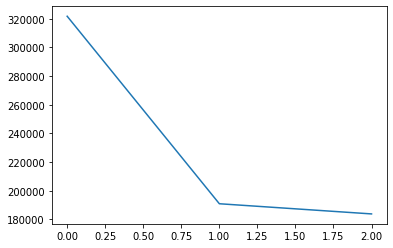

In [18]:
plt.plot(E)

In [36]:
row = 85709
print(X[row,:])

[574. 874.   3.]


In [37]:
ui = U[int(X[row,0]), :]
vj = V[:, int(X[row,1])]
pred_rating = np.dot(ui,vj)
print(pred_rating)

3.03108324638848
